###Importando bibliotecas

In [1]:
#Instalando biblioteca statstests
pip install statstests

In [2]:
import pandas as pd
import seaborn as sns
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)
import matplotlib.pyplot as plt
import statsmodels.api as sm
import altair as alt
import matplotlib.ticker as ticker
import numpy as np
from math import exp
from scipy import stats
from statstests.process import stepwise
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objs as go
import plotly.io as pio
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.discrete.discrete_model import Probit
from scipy.stats import norm
from statstests.process import stepwise
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objs as go
import plotly.io as pio
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import MNLogit
from statsmodels.discrete.discrete_model import Probit
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import chi2_contingency
pd.set_option("display.max.columns",None)
import warnings
warnings.filterwarnings('ignore')

###Loading Dataset

In [4]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
#Alterando as categorias das colunas categoricas
df["Education"] = df["Education"].replace({
1: "Below_College",
2: "College",
3: "Bachelor",
4: "Master",
5: "Doctor"})

df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({
1: "Low",
2: "Medium",
3: "High",
4: "Very_High"})

df["JobInvolvement"] = df["JobInvolvement"].replace({
1: "Low",
2: "Medium",
3: "High",
4: "Very_High"})

df["JobSatisfaction"] = df["JobSatisfaction"].replace({
1: "Low",
2: "Medium",
3: "High",
4: "Very_High"})

df["PerformanceRating"] = df["PerformanceRating"].replace({
1: "Low",
2: "Good",
3: "Excellent",
4: "Outstanding"})

df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({
1: "Low",
2: "Medium",
3: "High",
4: "Very_High"})

df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({
1: "Bad",
2: "Good",
3: "Better",
4: "Best"})

In [8]:
#Alterando o tipo da coluna JobLevel
df["JobLevel"] = df["JobLevel"].astype(object)

#Setando index da base
df = df = df.set_index('EmployeeNumber')

###Análise exploratória

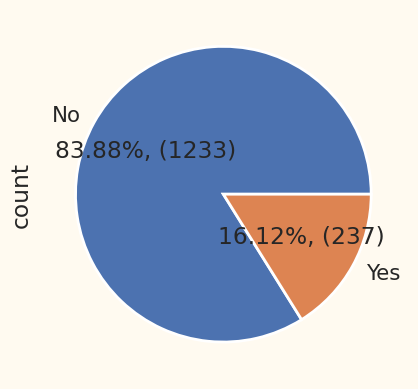

In [9]:
# Visualizando a proporção da base
values = df['Attrition'].value_counts().values
df['Attrition'].value_counts().plot.pie(autopct=lambda p:f'{p:.2f}%, ({p*sum(values)/100 :.0f})');

In [10]:
#Informações da base
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   object
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   object
 13  JobLevel                  1470 non-null   object
 14  JobRole                   147

In [11]:
#Identificando tipos de dados
column_data_types = df.dtypes

#Quantidade de colunas numericas e categoricas
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

print(f"Existem {numerical_count} colunas numéricas")
print(f"Existem {categorical_count} colunas cetegóricas")

Existem 17 colunas numéricas
Existem 17 colunas cetegóricas


In [12]:
#Criando um dataframe apenas com colunas numéricas
df_number = df.select_dtypes(np.number)

#Realizando análise descritiva das colunas numéricas
df_number.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
StandardHours,1470.0,80.000000,0.000000,80.0,80.0,80.0,80.00,80.0


In [13]:
#Selecionando as colunas categóricas da base
df.select_dtypes(include='O').sample(5)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
EmployeeNumber,,,,,,,,,,,,,,,,,
1263,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Very_High,Male,Medium,5,Research Director,Very_High,Single,Y,No,Excellent,High,Best
1464,Yes,Travel_Frequently,Research & Development,Bachelor,Life Sciences,Medium,Male,High,1,Laboratory Technician,Very_High,Married,Y,Yes,Excellent,High,Bad
1903,No,Travel_Rarely,Research & Development,Master,Life Sciences,Medium,Male,Very_High,2,Healthcare Representative,Low,Married,Y,No,Excellent,Very_High,Better
1449,No,Non-Travel,Research & Development,Master,Other,High,Male,High,2,Laboratory Technician,High,Divorced,Y,No,Excellent,High,Best
1311,No,Travel_Rarely,Research & Development,Bachelor,Technical Degree,Low,Female,Medium,2,Laboratory Technician,Very_High,Married,Y,No,Excellent,Low,Better


In [14]:
#Realizando análise descritiva das colunas categóicas
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,1,543
JobRole,1470,9,Sales Executive,326


In [15]:
#Verificando valores nulos
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EnvironmentSatisfaction,0,0.0


In [16]:
#Verificando valores duplicados
print("Valores duplicados: ",df.duplicated().sum())

Valores duplicados:  0


In [17]:
#Verificando valores das colunas categóricas
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print('Valores da coluna ', column, set(df[column]))
    print("-"*140)

Valores da coluna  Attrition {'No', 'Yes'}
--------------------------------------------------------------------------------------------------------------------------------------------
Valores da coluna  BusinessTravel {'Non-Travel', 'Travel_Rarely', 'Travel_Frequently'}
--------------------------------------------------------------------------------------------------------------------------------------------
Valores da coluna  Department {'Sales', 'Human Resources', 'Research & Development'}
--------------------------------------------------------------------------------------------------------------------------------------------
Valores da coluna  Education {'Doctor', 'College', 'Below_College', 'Master', 'Bachelor'}
--------------------------------------------------------------------------------------------------------------------------------------------
Valores da coluna  EducationField {'Marketing', 'Life Sciences', 'Technical Degree', 'Human Resources', 'Other', 'Medical'}
-------

###Data Wrangling

In [18]:
#Deletando colunas desnecessárias
cols = ["EmployeeCount", "Over18", "StandardHours"]
df.drop(columns=cols, inplace=True)

In [19]:
#Alterando coluna Atrittion para binária
df["Attrition"] = df["Attrition"].replace({"No":0,"Yes":1})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   object
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction           147

###Correlation Matrix

<Axes: title={'center': 'Correlation Plot'}>

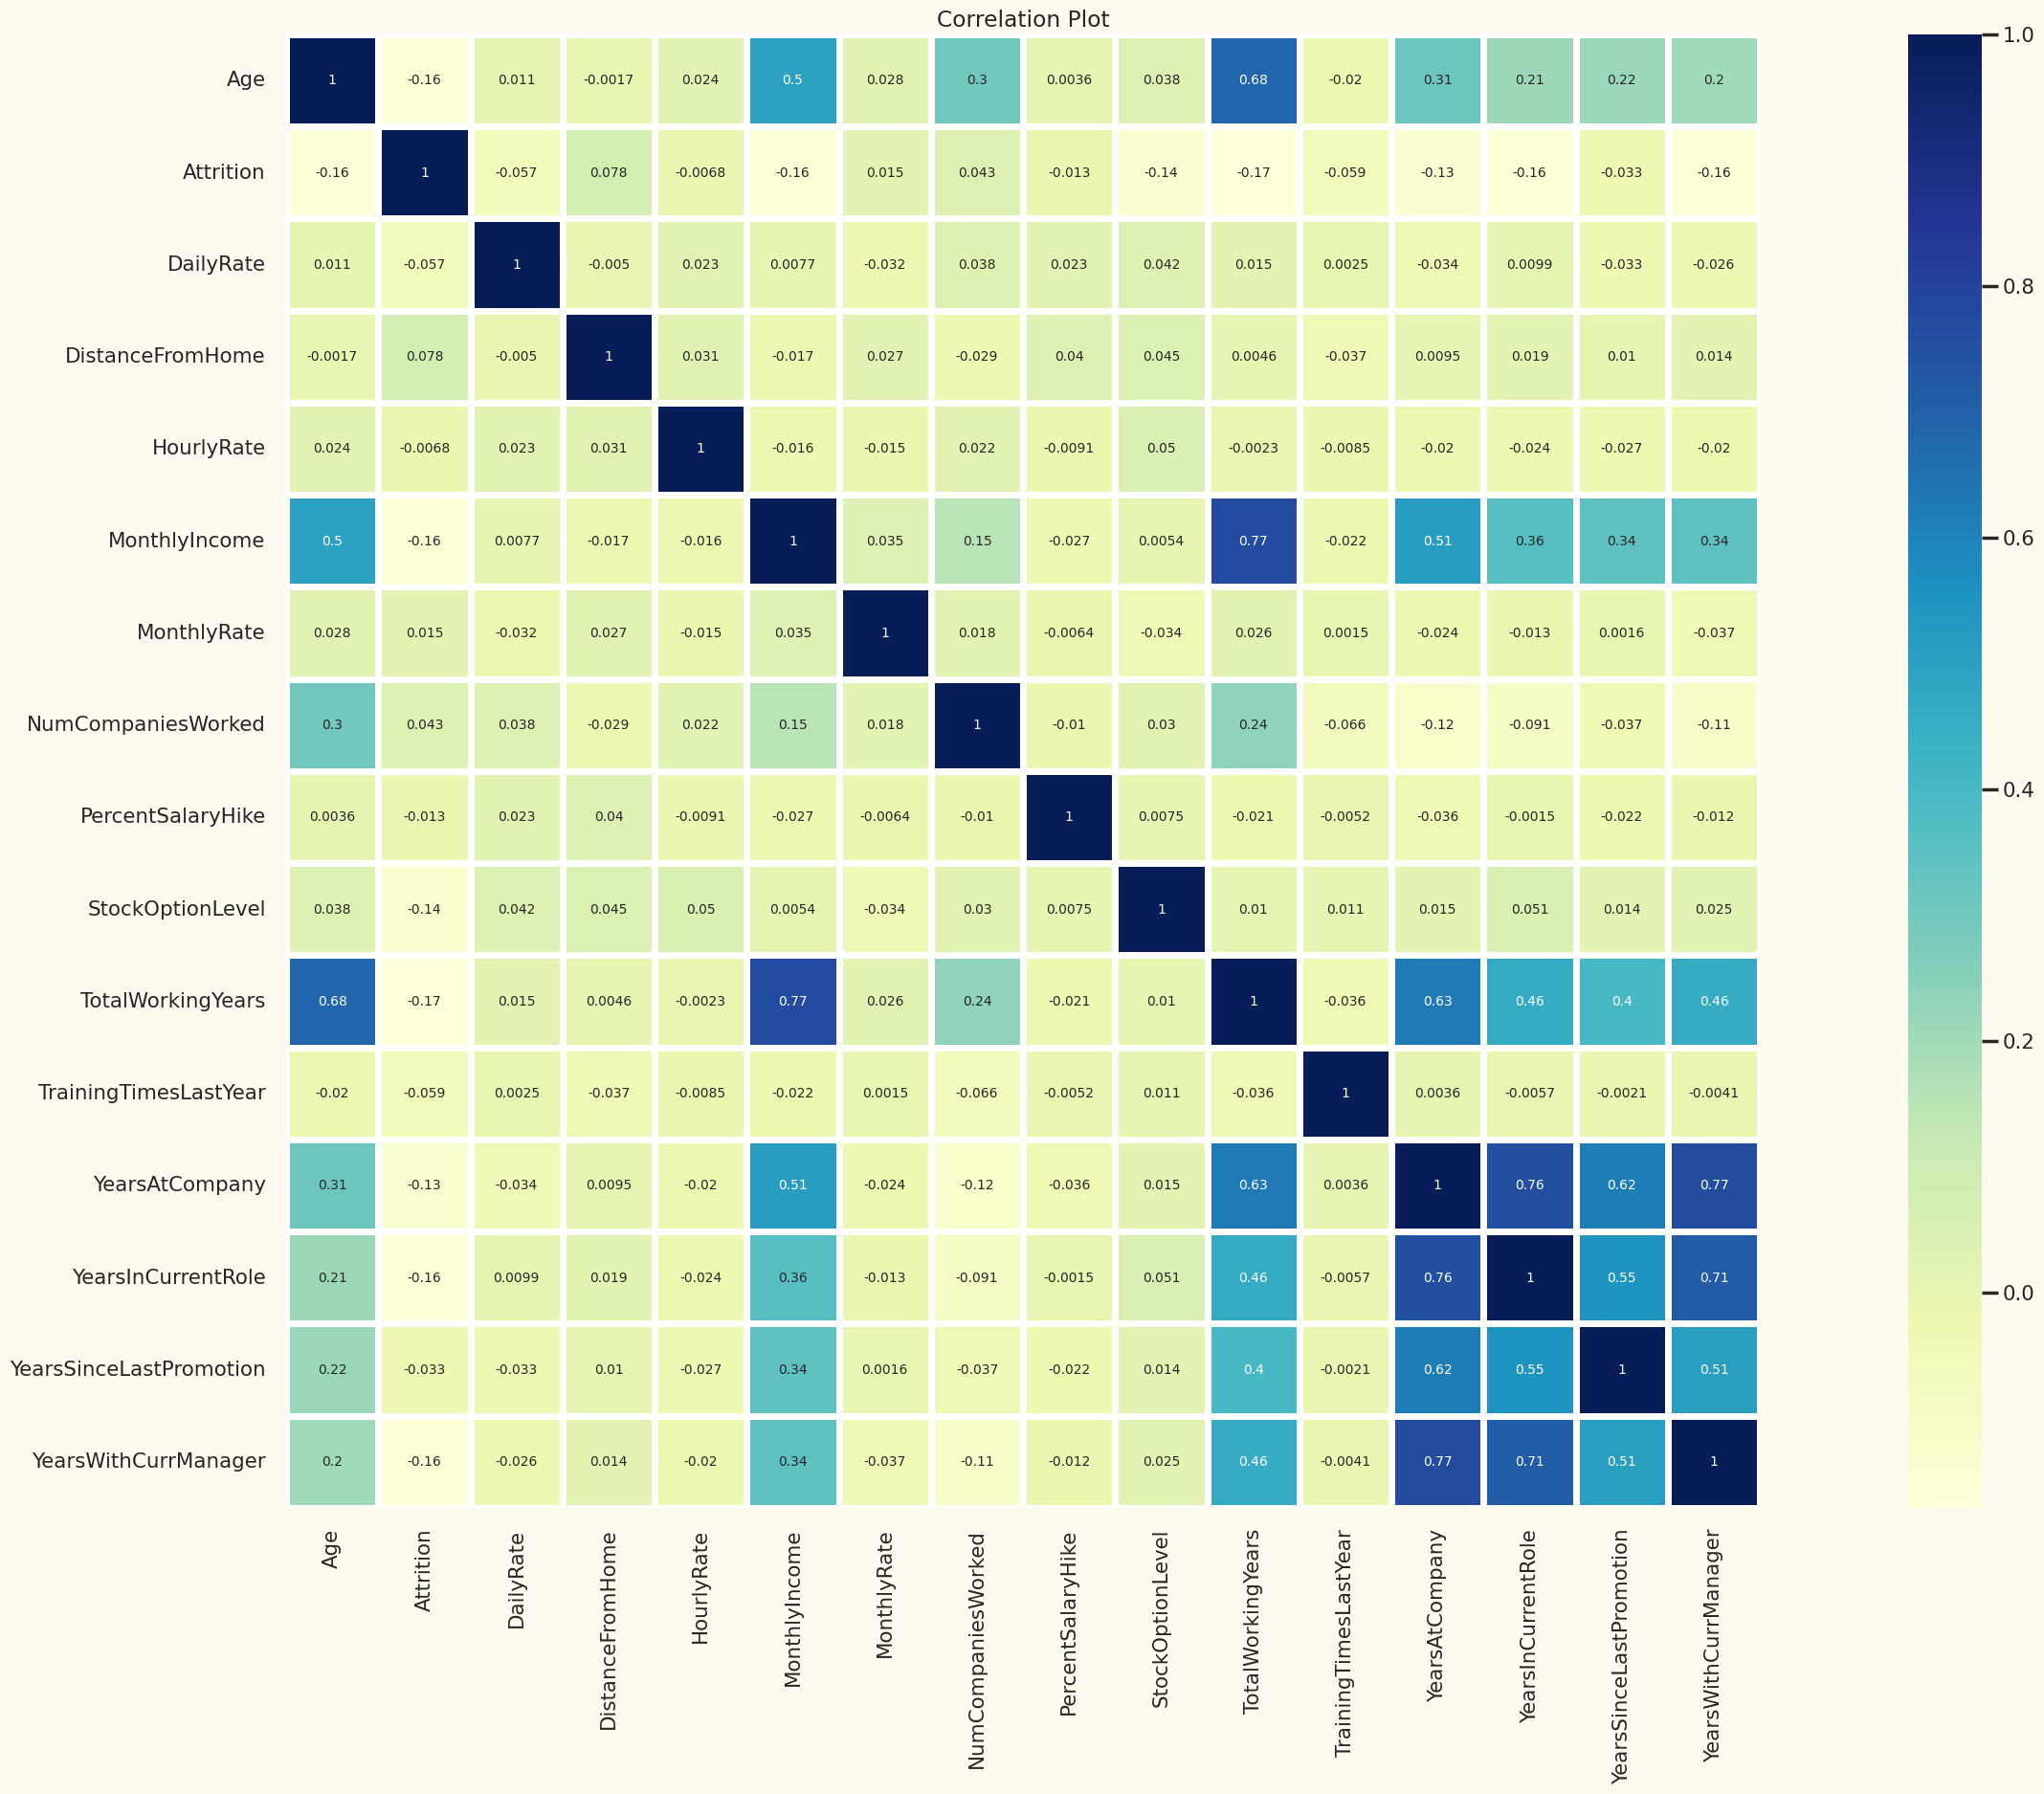

In [21]:
df_corr = df.select_dtypes(np.number)
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df_corr.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [22]:
corr_matrix = df_corr.corr()
highly_corr = corr_matrix >= 0.75
highly_corr_features = []

for feature in highly_corr.columns:
    correlated_with = highly_corr.index[highly_corr[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_corr_features:
            highly_corr_features.append((feature, correlated_feature))

#Verificando maiores correlações
print("Maiores correlações:")
for feature1, feature2 in highly_corr_features:
    print(f"{feature1} and {feature2}")

Maiores correlações:
MonthlyIncome and TotalWorkingYears
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager


###Dummização de variáveis

In [23]:
df_dummies = pd.get_dummies(df, columns=df.select_dtypes(include="O").columns,
                            dtype=int,
                            drop_first=True)

In [24]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1470 non-null   int64
 1   Attrition                           1470 non-null   int64
 2   DailyRate                           1470 non-null   int64
 3   DistanceFromHome                    1470 non-null   int64
 4   HourlyRate                          1470 non-null   int64
 5   MonthlyIncome                       1470 non-null   int64
 6   MonthlyRate                         1470 non-null   int64
 7   NumCompaniesWorked                  1470 non-null   int64
 8   PercentSalaryHike                   1470 non-null   int64
 9   StockOptionLevel                    1470 non-null   int64
 10  TotalWorkingYears                   1470 non-null   int64
 11  TrainingTimesLastYear               1470 non-null   int64
 12  YearsAtComp

In [25]:
df_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below_College,Education_College,Education_Doctor,Education_Master,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very_High,Gender_Male,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very_High,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very_High,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1102,1,94,5993,19479,8,11,0,8,0,6,4,0,5,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0
2,49,0,279,8,61,5130,24907,1,23,1,10,3,10,7,1,7,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0
4,37,1,1373,2,92,2090,2396,6,15,0,7,3,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0
5,33,0,1392,3,56,2909,23159,1,11,0,8,3,8,7,3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
7,27,0,591,2,40,3468,16632,9,12,1,6,3,2,2,2,2,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0


In [26]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 1470 non-null   int64
 1   Attrition                           1470 non-null   int64
 2   DailyRate                           1470 non-null   int64
 3   DistanceFromHome                    1470 non-null   int64
 4   HourlyRate                          1470 non-null   int64
 5   MonthlyIncome                       1470 non-null   int64
 6   MonthlyRate                         1470 non-null   int64
 7   NumCompaniesWorked                  1470 non-null   int64
 8   PercentSalaryHike                   1470 non-null   int64
 9   StockOptionLevel                    1470 non-null   int64
 10  TotalWorkingYears                   1470 non-null   int64
 11  TrainingTimesLastYear               1470 non-null   int64
 12  YearsAtComp

In [27]:
df_dummies = df_dummies.rename(columns={
    "BusinessTravel_Non-Travel":"BusinessTravel_Non_Travel",
    "Department_Human Resources":"Department_Human_Resources",
    "Department_Research & Development":"Department_Research_Development",
    "EducationField_Human Resources":"EducationField_Human_Resources",
    "EducationField_Life Sciences":"EducationField_Life_Sciences",
    "EducationField_Technical Degree":"EducationField_Technical_Degree",
    "JobRole_Healthcare Representative":"JobRole_Healthcare_Representative",
    "JobRole_Human Resources":"JobRole_Human_Resources",
    "JobRole_Laboratory Technician":"JobRole_Laboratory_Technician",
    "JobRole_Manufacturing Director":"JobRole_Manufacturing_Director",
    "JobRole_Research Director": "JobRole_Research_Director",
    "JobRole_Research Scientist":"JobRole_Research_Scientist",
    "JobRole_Sales Executive":"JobRole_Sales_Executive",
    "JobRole_Sales Representative":"JobRole_Sales_Representative"
    })

###Separanado variável y das variáveis x

In [28]:
# Separando em X e y
x = df_dummies.drop('Attrition',axis=1)
y = df_dummies.Attrition

###Separando treino e teste

In [29]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [30]:
# Fazendo a separação em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,
                                                    random_state=42,stratify=y)

In [31]:
# Verificando a proporção na base de treino
(y_train.value_counts()/y_train.shape[0])*100

,count
Attrition,
0,83.843537
1,16.156463


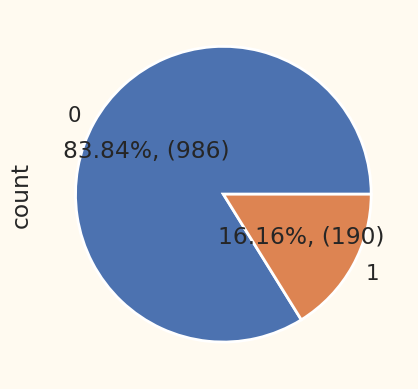

In [32]:
y_train_values = y_train.value_counts()
y_train.value_counts().plot.pie(autopct=lambda p:f'{p:.2f}%, ({p*sum(y_train_values)/100 :.0f})');

In [33]:
# Contando a quantidade de registros na base de treino
y_train.value_counts()

,count
Attrition,
0,986
1,190


In [34]:
# E na base de teste
(y_test.value_counts()/y_test.shape[0])*100

,count
Attrition,
0,84.013605
1,15.986395


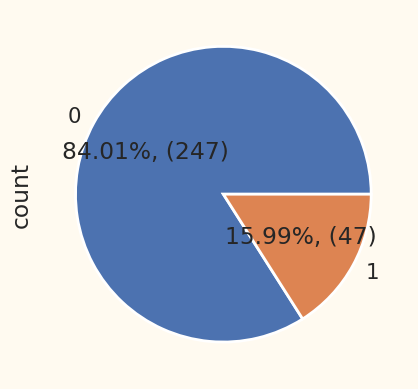

In [35]:
y_test_values = y_test.value_counts()
y_test.value_counts().plot.pie(autopct=lambda p:f'{p:.2f}%, ({p*sum(y_test_values)/100 :.0f})');

In [36]:
# Contando a quantidade de registros na base de teste
y_test.value_counts()

,count
Attrition,
0,247
1,47


In [37]:
#Criando os datasets de treino e teste
x_train["Attrition"] = y_train
x_test["Attrition"] = y_test
df_treino = x_train
df_teste = x_test

###Modelo logístico binário base de treino

In [38]:
# Sugestão de uso neste caso, dada a existência de muitas dummies no dataframe
# Definição da fórmula utilizada no modelo

lista_colunas_treino = list(df_treino.drop(columns=['Attrition']).columns)
formula_dummies_modelo_treino = ' + '.join(lista_colunas_treino)
formula_dummies_modelo_treino = "Attrition ~ " + formula_dummies_modelo_treino
print("Fórmula utilizada: ",formula_dummies_modelo_treino)

# Modelo propriamente dito
modelo_turnover_treino = sm.Logit.from_formula(formula_dummies_modelo_treino,
                                               df_treino).fit()

# Parâmetros do 'modelo_fidelidade'
modelo_turnover_treino.summary()

Fórmula utilizada:  Attrition ~ Age + DailyRate + DistanceFromHome + HourlyRate + MonthlyIncome + MonthlyRate + NumCompaniesWorked + PercentSalaryHike + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager + BusinessTravel_Travel_Frequently + BusinessTravel_Travel_Rarely + Department_Research_Development + Department_Sales + Education_Below_College + Education_College + Education_Doctor + Education_Master + EducationField_Life_Sciences + EducationField_Marketing + EducationField_Medical + EducationField_Other + EducationField_Technical_Degree + EnvironmentSatisfaction_Low + EnvironmentSatisfaction_Medium + EnvironmentSatisfaction_Very_High + Gender_Male + JobInvolvement_Low + JobInvolvement_Medium + JobInvolvement_Very_High + JobLevel_2 + JobLevel_3 + JobLevel_4 + JobLevel_5 + JobRole_Human_Resources + JobRole_Laboratory_Technician + JobRole_Manager + JobRole_Manufacturing_Director + JobRole_

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1115
Method:                           MLE   Df Model:                           60
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.4149
Time:                        14:30:55   Log-Likelihood:                -304.29
converged:                      False   LL-Null:                       -520.09
Covariance Type:            nonrobust   LLR p-value:                 1.207e-57
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -14.1390    886.598     -0.016      0.987   -1751.839    1723.561
Age                                   -0.0392      0.017     -2.302      0.021      -0.073      -0.006
DailyRate                             -0.0006      0.000     -2.239      0.025      -0.001    -7.5e-05
DistanceFromHome                       0.0615      0.013      4.666      0.000       0.036       0.087
HourlyRate                             0.0023      0.005      0.430      0.667      -0.008       0.013
MonthlyIncome                         -0.0001      0.000     -1.171      0.242      -0.000    8.42e-05
MonthlyRate                         9.144e-06    1.5e-05      0.608      0.543   -2.03e-05    3.86e-05
NumCompaniesWorked                     0.2160      0.048      4.524      0.000       0.122       0.310
PercentSalaryHike                     -0.0351      0.047     -0.749      0.454      -0.127       0.057
StockOptionLevel                      -0.3323      0.198     -1.676      0.094      -0.721       0.056
TotalWorkingYears                     -0.0745      0.036     -2.076      0.038      -0.145      -0.004
TrainingTimesLastYear                 -0.1480      0.087     -1.702      0.089      -0.318       0.022
YearsAtCompany                         0.0226      0.049      0.460      0.646      -0.074       0.119
YearsInCurrentRole                    -0.0703      0.059     -1.194      0.233      -0.186       0.045
YearsSinceLastPromotion                0.1668      0.052      3.231      0.001       0.066       0.268
YearsWithCurrManager                  -0.1346      0.059     -2.267      0.023      -0.251      -0.018
BusinessTravel_Travel_Frequently       2.2175      0.521      4.256      0.000       1.196       3.239
BusinessTravel_Travel_Rarely           1.2114      0.482      2.512      0.012       0.266       2.157
Department_Research_Development       14.7229    886.597      0.017      0.987   -1722.976    1752.421
Department_Sales                      13.8162    886.597      0.016      0.988   -1723.882    1751.515
Education_Below_College               -0.1877      0.341     -0.551      0.582      -0.855       0.480
Education_College                     -0.2184      0.313     -0.698      0.485      -0.831       0.395
Education_Doctor                      -0.2473      0.726     -0.341      0.733      -1.670       1.175
Education_Master                      -0.0779      0.277     -0.282      0.778      -0.620       0.464
EducationField_Life_Sciences          -1.8316      1.027     -1.784      0.074      -3.844       0.181
EducationField_Marketing              -1.5607      1.072     -1.456      0.145      -3.661       0.540
EducationField_Medical                -1.8539      1.027     -1.805      0.071      -3.867       0.159
EducationField_Other                  -2.4943      1.141     -2.185      0.029      -4.732      -0.257
EducationField_Technical_Degree       -1.1230   

In [39]:
# Parâmetros do 'modelo_logit' com intervalos de confiança
# Nível de significância de 5% / Nível de confiança de 95%
modelo_turnover_treino.conf_int(alpha=0.05)

,0,1
Intercept,-1751.839194,1723.561140
Age,-0.072554,-0.005829
DailyRate,-0.001128,-0.000075
DistanceFromHome,0.035670,0.087350
HourlyRate,-0.008166,0.012761
...,...,...
RelationshipSatisfaction_Medium,-0.568696,0.707862
RelationshipSatisfaction_Very_High,-0.640861,0.481673
WorkLifeBalance_Best,-2.112784,-0.180821
WorkLifeBalance_Better,-2.584844,-0.974571


In [40]:
summary_col([modelo_turnover_treino],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,-14.1390
,(886.5980)
Age,-0.0392**
,(0.0170)
DailyRate,-0.0006**
,(0.0003)
DistanceFromHome,0.0615***
,(0.0132)
HourlyRate,0.0023
,(0.0053)


In [41]:
# Sugestão de uso neste caso, dada a existência de muitas dummies no dataframe
# Definição da fórmula utilizada no modelo

lista_colunas_geral = list(df_dummies.drop(columns=['Attrition']).columns)
formula_dummies_modelo_geral = ' + '.join(lista_colunas_geral)
formula_dummies_modelo_geral = "Attrition ~ " + formula_dummies_modelo_geral
print("Fórmula utilizada: ",formula_dummies_modelo_geral)

# Modelo propriamente dito
modelo_turnover_geral = sm.Logit.from_formula(formula_dummies_modelo_geral,
                                               df_dummies).fit()

# Parâmetros do 'modelo_fidelidade'
modelo_turnover_geral.summary()

Fórmula utilizada:  Attrition ~ Age + DailyRate + DistanceFromHome + HourlyRate + MonthlyIncome + MonthlyRate + NumCompaniesWorked + PercentSalaryHike + StockOptionLevel + TotalWorkingYears + TrainingTimesLastYear + YearsAtCompany + YearsInCurrentRole + YearsSinceLastPromotion + YearsWithCurrManager + BusinessTravel_Travel_Frequently + BusinessTravel_Travel_Rarely + Department_Research_Development + Department_Sales + Education_Below_College + Education_College + Education_Doctor + Education_Master + EducationField_Life_Sciences + EducationField_Marketing + EducationField_Medical + EducationField_Other + EducationField_Technical_Degree + EnvironmentSatisfaction_Low + EnvironmentSatisfaction_Medium + EnvironmentSatisfaction_Very_High + Gender_Male + JobInvolvement_Low + JobInvolvement_Medium + JobInvolvement_Very_High + JobLevel_2 + JobLevel_3 + JobLevel_4 + JobLevel_5 + JobRole_Human_Resources + JobRole_Laboratory_Technician + JobRole_Manager + JobRole_Manufacturing_Director + JobRole_

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1409
Method:                           MLE   Df Model:                           60
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.3926
Time:                        14:30:56   Log-Likelihood:                -394.35
converged:                      False   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.495e-72
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                            -22.0702   2.65e+04     -0.001      0.999   -5.19e+04    5.19e+04
Age                                   -0.0306      0.014     -2.152      0.031      -0.058      -0.003
DailyRate                             -0.0004      0.000     -1.700      0.089      -0.001    6.05e-05
DistanceFromHome                       0.0550      0.011      4.785      0.000       0.032       0.077
HourlyRate                             0.0044      0.005      0.928      0.353      -0.005       0.014
MonthlyIncome                         -0.0001   9.52e-05     -1.409      0.159      -0.000    5.24e-05
MonthlyRate                         1.006e-05   1.31e-05      0.768      0.442   -1.56e-05    3.57e-05
NumCompaniesWorked                     0.2143      0.041      5.225      0.000       0.134       0.295
PercentSalaryHike                     -0.0236      0.041     -0.576      0.565      -0.104       0.057
StockOptionLevel                      -0.1563      0.161     -0.969      0.333      -0.473       0.160
TotalWorkingYears                     -0.0569      0.031     -1.861      0.063      -0.117       0.003
TrainingTimesLastYear                 -0.1816      0.075     -2.405      0.016      -0.330      -0.034
YearsAtCompany                         0.0969      0.042      2.302      0.021       0.014       0.179
YearsInCurrentRole                    -0.1374      0.051     -2.707      0.007      -0.237      -0.038
YearsSinceLastPromotion                0.1728      0.045      3.830      0.000       0.084       0.261
YearsWithCurrManager                  -0.1494      0.050     -3.002      0.003      -0.247      -0.052
BusinessTravel_Travel_Frequently       2.1246      0.449      4.728      0.000       1.244       3.005
BusinessTravel_Travel_Rarely           1.1894      0.415      2.867      0.004       0.376       2.003
Department_Research_Development       21.0626   2.65e+04      0.001      0.999   -5.19e+04    5.19e+04
Department_Sales                      20.0481   2.65e+04      0.001      0.999   -5.19e+04    5.19e+04
Education_Below_College               -0.1495      0.305     -0.491      0.624      -0.746       0.447
Education_College                      0.0096      0.267      0.036      0.971      -0.513       0.532
Education_Doctor                       0.0634      0.588      0.108      0.914      -1.090       1.216
Education_Master                       0.0196      0.244      0.080      0.936      -0.459       0.498
EducationField_Life_Sciences          -1.2763      0.867     -1.473      0.141      -2.975       0.422
EducationField_Marketing              -0.7288      0.911     -0.800      0.424      -2.515       1.057
EducationField_Medical                -1.2368      0.864     -1.431      0.152      -2.931       0.457
EducationField_Other                  -1.1614      0.935     -1.243      0.214      -2.993       0.671
EducationField_Technical_Degree       -0.1778   

In [42]:
# Parâmetros do 'modelo_logit' com intervalos de confiança
# Nível de significância de 5% / Nível de confiança de 95%
modelo_turnover_geral.conf_int(alpha=0.05)

,0,1
Intercept,-51938.650199,51894.509884
Age,-0.058458,-0.002731
DailyRate,-0.000851,0.000060
DistanceFromHome,0.032445,0.077470
HourlyRate,-0.004850,0.013579
...,...,...
RelationshipSatisfaction_Medium,-0.525483,0.577198
RelationshipSatisfaction_Very_High,-0.509276,0.463350
WorkLifeBalance_Best,-1.840078,-0.125791
WorkLifeBalance_Better,-2.127698,-0.709613


In [43]:
summary_col([modelo_turnover_geral],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })

,MODELO
Intercept,-22.0702
,(26488.5378)
Age,-0.0306**
,(0.0142)
DailyRate,-0.0004*
,(0.0002)
DistanceFromHome,0.0550***
,(0.0115)
HourlyRate,0.0044
,(0.0047)


###STEPWISE

In [44]:
from statstests.process import stepwise

#Estimação do modelo por meio do procedimento Stepwise
step_modelo_turnover_treino = stepwise(modelo_turnover_treino, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Attrition ~ Q('Age') + Q('DailyRate') + Q('DistanceFromHome') + Q('HourlyRate') + Q('MonthlyIncome') + Q('MonthlyRate') + Q('NumCompaniesWorked') + Q('PercentSalaryHike') + Q('StockOptionLevel') + Q('TotalWorkingYears') + Q('TrainingTimesLastYear') + Q('YearsAtCompany') + Q('YearsInCurrentRole') + Q('YearsSinceLastPromotion') + Q('YearsWithCurrManager') + Q('BusinessTravel_Travel_Frequently') + Q('BusinessTravel_Travel_Rarely') + Q('Department_Research_Development') + Q('Department_Sales') + Q('Education_Below_College') + Q('Education_College') + Q('Education_Doctor') + Q('Education_Master') + Q('EducationField_Life_Sciences') + Q('EducationField_Marketing') + Q('EducationField_Medical') + Q('EducationField_Other') + Q('EducationField_Technical_Degree') + Q('EnvironmentSatisfaction_Low') + Q('EnvironmentSatisfaction_Medium') + Q('EnvironmentSatisfaction_Very_High') + Q('Gender_Male') + Q('JobInvolvement_Low') + Q('JobInvolvement_Medium') 

In [45]:
# Parâmetros do 'step_modelo_logit' com intervalos de confiança
# Nível de significância de 5% / Nível de confiança de 95%
step_modelo_turnover_treino.conf_int(alpha=0.05)

,0,1
Intercept,-1.575140,1.618739
Q('Age'),-0.075921,-0.013473
Q('DailyRate'),-0.001082,-0.000110
Q('DistanceFromHome'),0.031159,0.079963
Q('MonthlyIncome'),-0.000281,-0.000087
Q('NumCompaniesWorked'),0.134037,0.303220
Q('TotalWorkingYears'),-0.123831,-0.000149
Q('YearsSinceLastPromotion'),0.072433,0.240990
Q('YearsWithCurrManager'),-0.223750,-0.053810
Q('BusinessTravel_Travel_Frequently'),1.084747,2.969728


In [46]:
# Inserção dos fitted values ('phat') do 'step_modelo_logit' no dataset 'atrasado'
# Probabilidade de se chegar atrasado para cada observação
df_treino['phat'] = step_modelo_turnover_treino.predict()

In [47]:
# Visualização da base de dados com a variável 'phat'
df_treino

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research_Development,Department_Sales,Education_Below_College,Education_College,Education_Doctor,Education_Master,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very_High,Gender_Male,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very_High,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human_Resources,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very_High,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Attrition,phat
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1676,47,1225,2,47,15972,21086,6,14,3,29,2,3,2,1,2,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.001023
169,22,594,2,100,2523,19299,0,14,1,3,2,2,1,2,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0.038727
1124,46,406,3,52,17465,15596,3,12,1,23,3,12,9,4,9,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0.002323
645,25,622,13,40,2096,26376,1,11,0,7,1,7,4,0,6,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.056230
663,43,1001,9,72,5679,19627,3,13,1,10,3,8,7,4,7,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0.057635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,23,427,7,99,2275,25103,1,21,1,3,2,3,2,0,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0.266734
1355,38,1009,2,31,6893,19461,3,15,1,11,3,7,7,1,7,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0.004606
1019,22,217,8,94,2451,6881,1,15,1,4,3,4,3,1,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0.782978


###Testanto o modelo

In [48]:
#Teste do modelo
df_teste["phat"] = step_modelo_turnover_treino.predict(pd.DataFrame(df_teste))
df_teste

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research_Development,Department_Sales,Education_Below_College,Education_College,Education_Doctor,Education_Master,EducationField_Life_Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical_Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very_High,Gender_Male,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very_High,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human_Resources,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very_High,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very_High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Attrition,phat
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1495,24,830,13,78,2033,7103,1,13,1,1,2,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0.058330
1246,44,1117,2,72,2011,19982,1,13,1,10,5,10,5,7,7,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0.007480
613,31,688,7,44,11557,25291,9,21,1,10,3,5,4,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.033514
1288,44,1199,4,92,19190,17477,1,14,2,26,4,25,9,14,13,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.008050
90,36,318,9,79,3388,21777,0,17,1,2,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0.320373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,43,244,2,97,3539,5033,0,13,0,10,5,9,7,1,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0.010620
1903,44,170,1,78,5033,9364,2,15,1,10,5,2,0,2,2,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0.004100
1733,36,1456,13,96,6134,8658,5,13,3,16,3,2,2,2,2,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0.145735


###Feature Importances

In [49]:
feature_importances = step_modelo_turnover_treino.params

In [50]:
df_params = pd.DataFrame(feature_importances)
df_params.columns = ['Valor']
df_params['Variável'] = df_params.index
df_params = df_params.reset_index(drop=True)
df_params

,Valor,Variável
0,0.021800,Intercept
1,-0.044697,Q('Age')
2,-0.000596,Q('DailyRate')
3,0.055561,Q('DistanceFromHome')
4,-0.000184,Q('MonthlyIncome')
5,0.218629,Q('NumCompaniesWorked')
6,-0.061990,Q('TotalWorkingYears')
7,0.156712,Q('YearsSinceLastPromotion')
8,-0.138780,Q('YearsWithCurrManager')
9,2.027238,Q('BusinessTravel_Travel_Frequently')


In [51]:
df_params = pd.DataFrame(list(feature_importances.items()), columns=['Variável', 'Valor'])
df_params['Variável'] = df_params['Variável'].str.replace("Q('", "").str.replace("')", "")
df_params

,Variável,Valor
0,Intercept,0.021800
1,Age,-0.044697
2,DailyRate,-0.000596
3,DistanceFromHome,0.055561
4,MonthlyIncome,-0.000184
5,NumCompaniesWorked,0.218629
6,TotalWorkingYears,-0.061990
7,YearsSinceLastPromotion,0.156712
8,YearsWithCurrManager,-0.138780
9,BusinessTravel_Travel_Frequently,2.027238


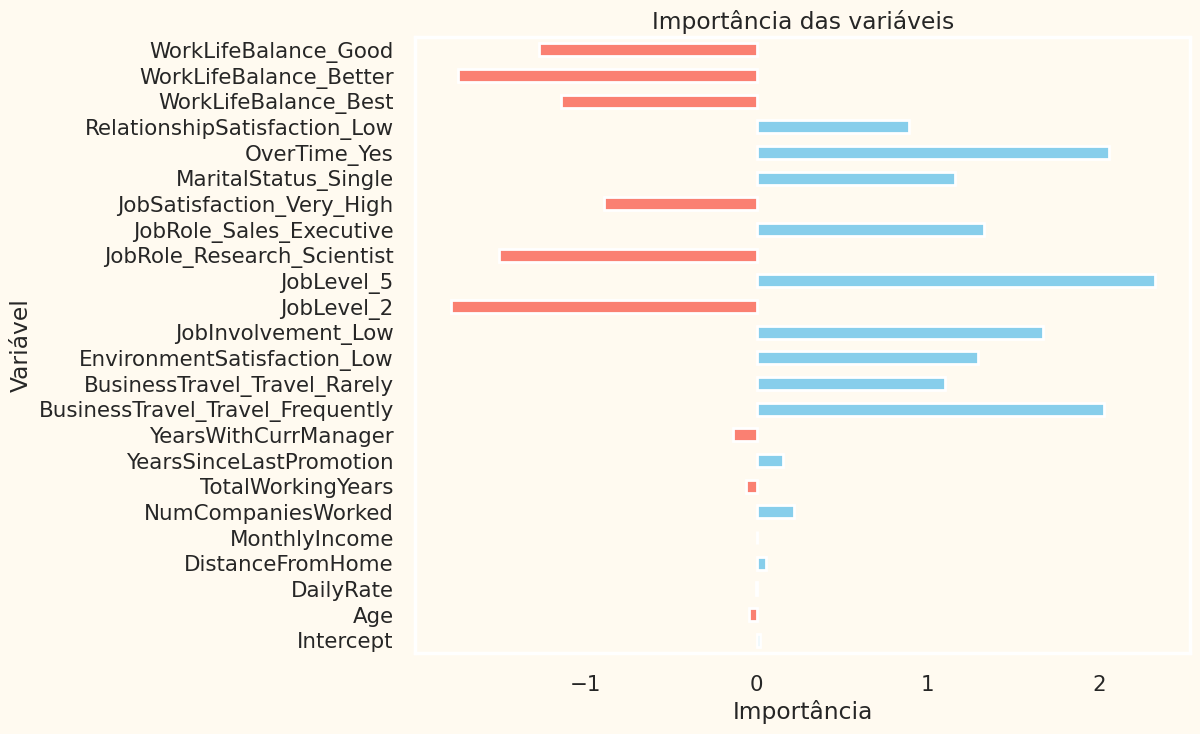

In [52]:
# Plotando gráfico de Importância das variáveis
ax = df_params.plot.barh('Variável', 'Valor', legend=False, figsize=(10, 8), color=['salmon' if val < 0 else 'skyblue' for val in df_params['Valor']])
ax.set_xlabel('Importância')
ax.set_title("Importância das variáveis")
ax.grid(False)

###ANÁLISE DE SENSIBILIDADE - CONSTRUÇÃO DA MATRIZ DE CONFUSÃO

In [53]:
# Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(predicts, observado, cutoff):

    values = predicts.values

    predicao_binaria = []

    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)

    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()

    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    # Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores

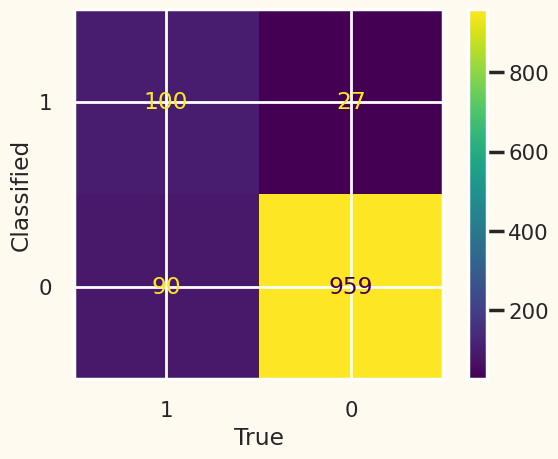

,Sensitividade,Especificidade,Acurácia
0,0.526316,0.972617,0.90051


In [54]:
# Matriz de confusão para cutoff = 0.5 base de treino
matriz_confusao(observado=df_treino['Attrition'],
                predicts=df_treino['phat'],
                cutoff=0.50)

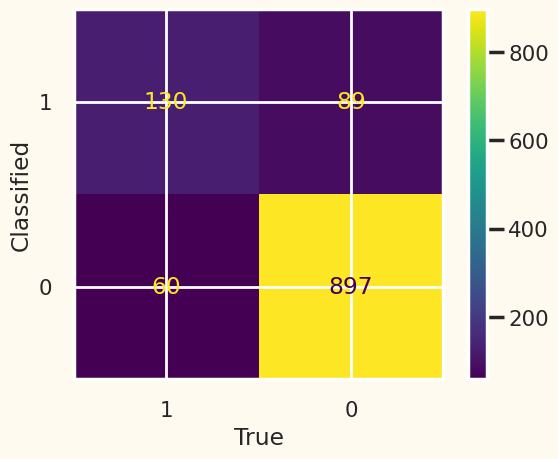

,Sensitividade,Especificidade,Acurácia
0,0.684211,0.909736,0.873299


In [55]:
# Matriz de confusão treino para cutoff = 0.3
matriz_confusao(observado=df_treino['Attrition'],
                predicts=df_treino['phat'],
                cutoff=0.30)

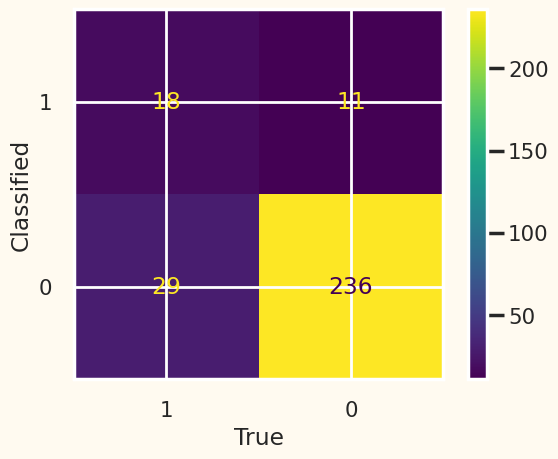

,Sensitividade,Especificidade,Acurácia
0,0.382979,0.955466,0.863946


In [56]:
# Matriz de confusão para cutoff = 0.5 base de teste
matriz_confusao(observado=df_teste['Attrition'],
                predicts=df_teste['phat'],
                cutoff=0.50)

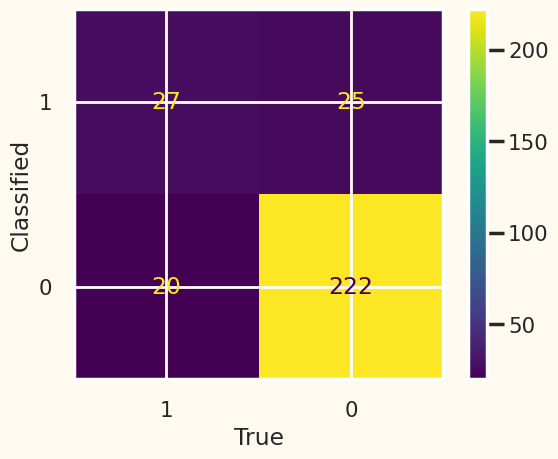

,Sensitividade,Especificidade,Acurácia
0,0.574468,0.898785,0.846939


In [57]:
# Matriz de confusão teste para cutoff = 0.3
matriz_confusao(observado=df_teste['Attrition'],
                predicts=df_teste['phat'],
                cutoff=0.30)

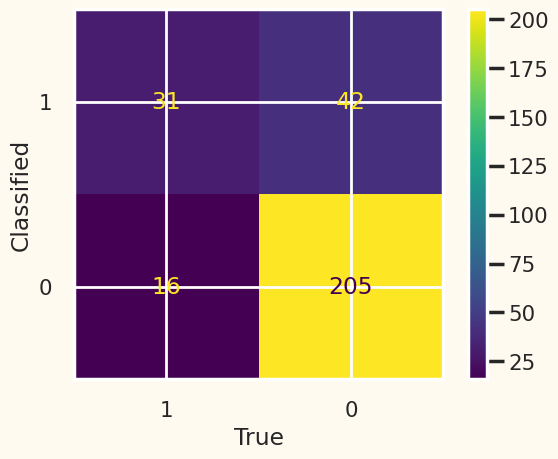

,Sensitividade,Especificidade,Acurácia
0,0.659574,0.82996,0.802721


In [58]:
# Matriz de confusão teste para cutoff = 0.2
matriz_confusao(observado=df_teste['Attrition'],
                predicts=df_teste['phat'],
                cutoff=0.20)

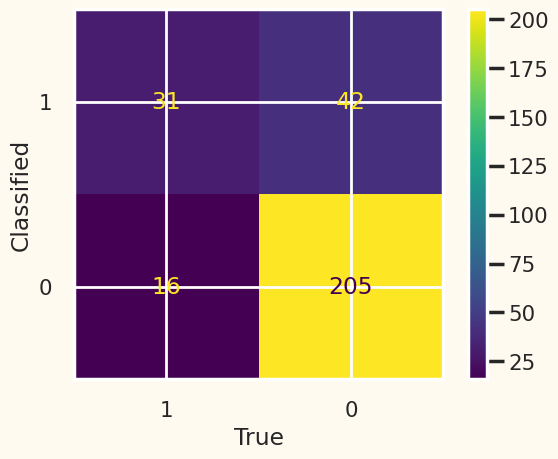

,Sensitividade,Especificidade,Acurácia
0,0.659574,0.82996,0.802721


In [59]:
# Matriz de confusão teste para cutoff = 0.2
matriz_confusao(observado=df_teste['Attrition'],
                predicts=df_teste['phat'],
                cutoff=0.20)

###CURVA DE SENSIBILIDADE

In [60]:
# Criação da função 'espec_sens' para a construção de um dataset com diferentes
#valores de cutoff, sensitividade e especificidade:

def espec_sens(observado,predicts):

    # adicionar objeto com os valores dos predicts
    values = predicts.values

    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)

    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []

    for cutoff in cutoffs:

        predicao_binaria = []

        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)

        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)

        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)

    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [61]:
df_treino["phat"] = step_modelo_turnover_treino.predict(pd.DataFrame(df_treino))


In [62]:
# Até o momento, foram extraídos 3 vetores: 'sensitividade',
#'especificidade' e 'cutoffs'. Assim, criamos um dataframe que contém
#os vetores mencionados

dados_plotagem_treino = espec_sens(observado = df_treino['Attrition'],
                            predicts = df_treino['phat'])
dados_plotagem_teste = espec_sens(observado = df_teste['Attrition'],
                            predicts = df_teste['phat'])

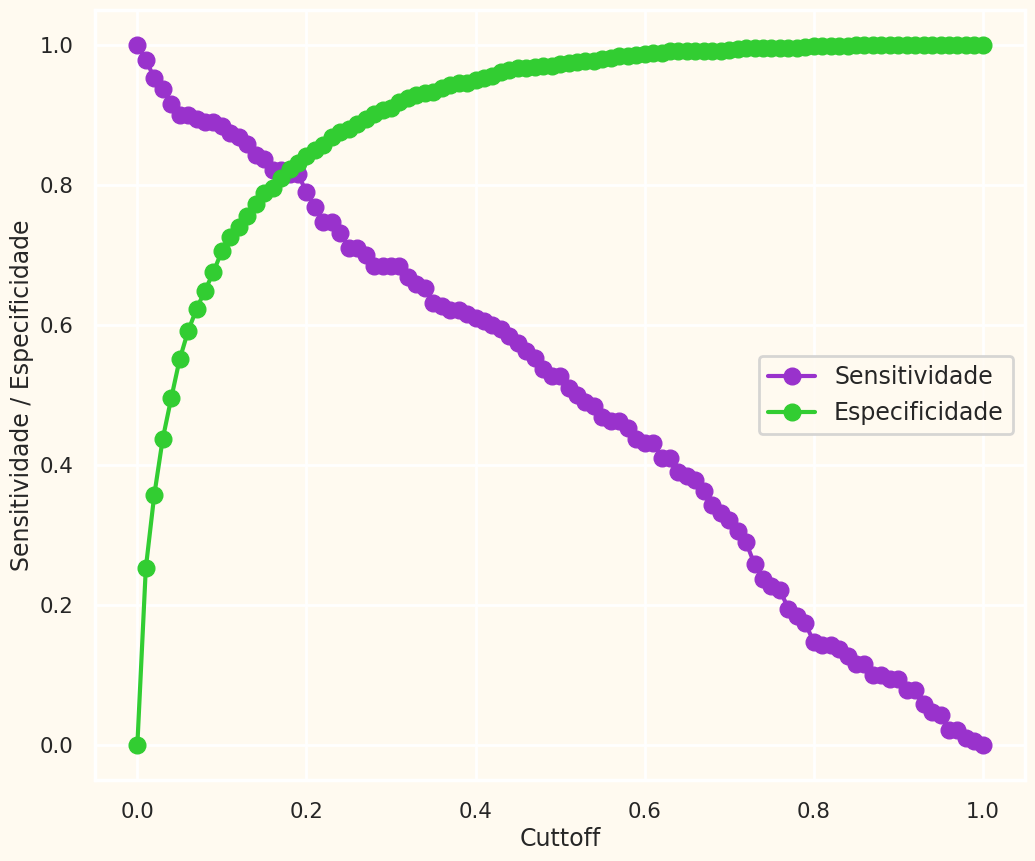

In [63]:
#dita dos valores de sensitividade e especificidade em função dos cutoffs
#(curva de sensibilidade base de treino)

plt.figure(figsize=(12,10))
plt.plot(dados_plotagem_treino.cutoffs,dados_plotagem_treino.sensitividade, '-o',
         color='darkorchid')
plt.plot(dados_plotagem_treino.cutoffs,dados_plotagem_treino.especificidade, '-o',
         color='limegreen')
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel('Cuttoff', fontsize=17)
plt.ylabel('Sensitividade / Especificidade', fontsize=17)
plt.show()

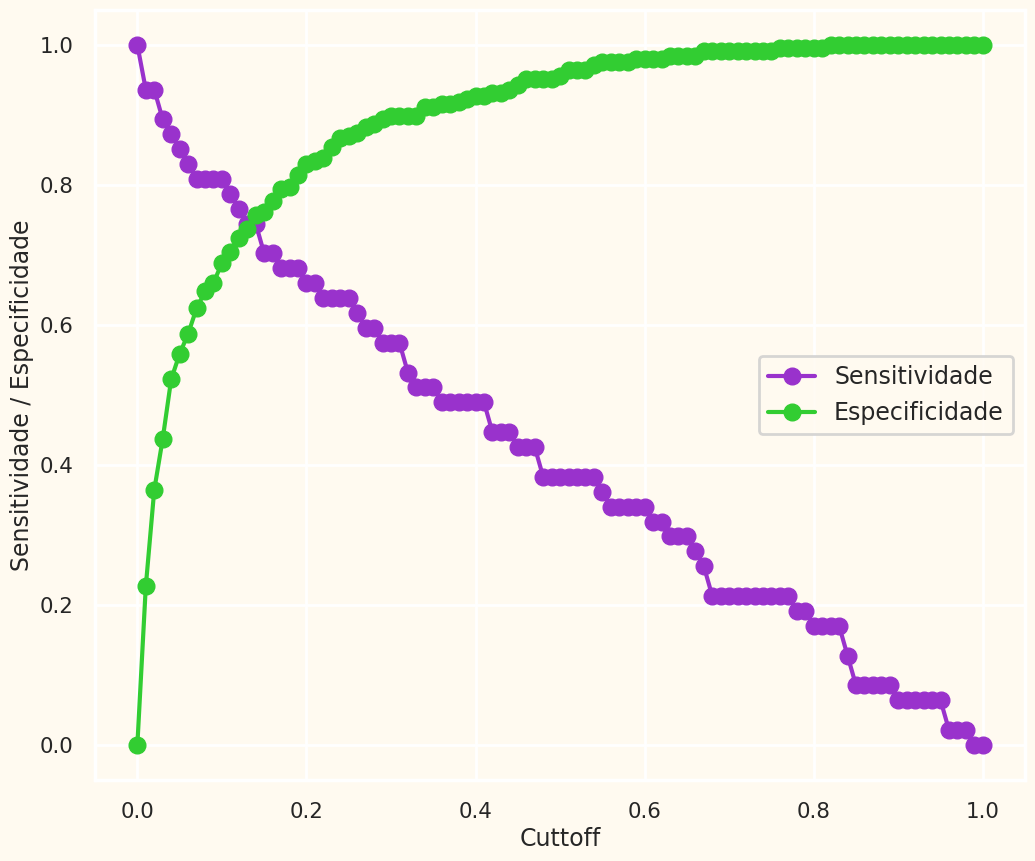

In [64]:
#dita dos valores de sensitividade e especificidade em função dos cutoffs
#(curva de sensibilidade base de teste)

plt.figure(figsize=(12,10))
plt.plot(dados_plotagem_teste.cutoffs,dados_plotagem_teste.sensitividade, '-o',
         color='darkorchid')
plt.plot(dados_plotagem_teste.cutoffs,dados_plotagem_teste.especificidade, '-o',
         color='limegreen')
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel('Cuttoff', fontsize=17)
plt.ylabel('Sensitividade / Especificidade', fontsize=17)
plt.show()

###CONSTRUÇÃO DA CURVA ROC

In [65]:
from sklearn.metrics import roc_curve, auc

# Função 'roc_curve' do pacote 'metrics' do sklearn

fpr_treino, tpr_treino, thresholds_treino = roc_curve(df_treino['Attrition'],df_treino['phat'])
roc_auc_treino = auc(fpr_treino, tpr_treino)

# Cálculo do coeficiente de GINI
gini_treino = (roc_auc_treino - 0.5)/(0.5)

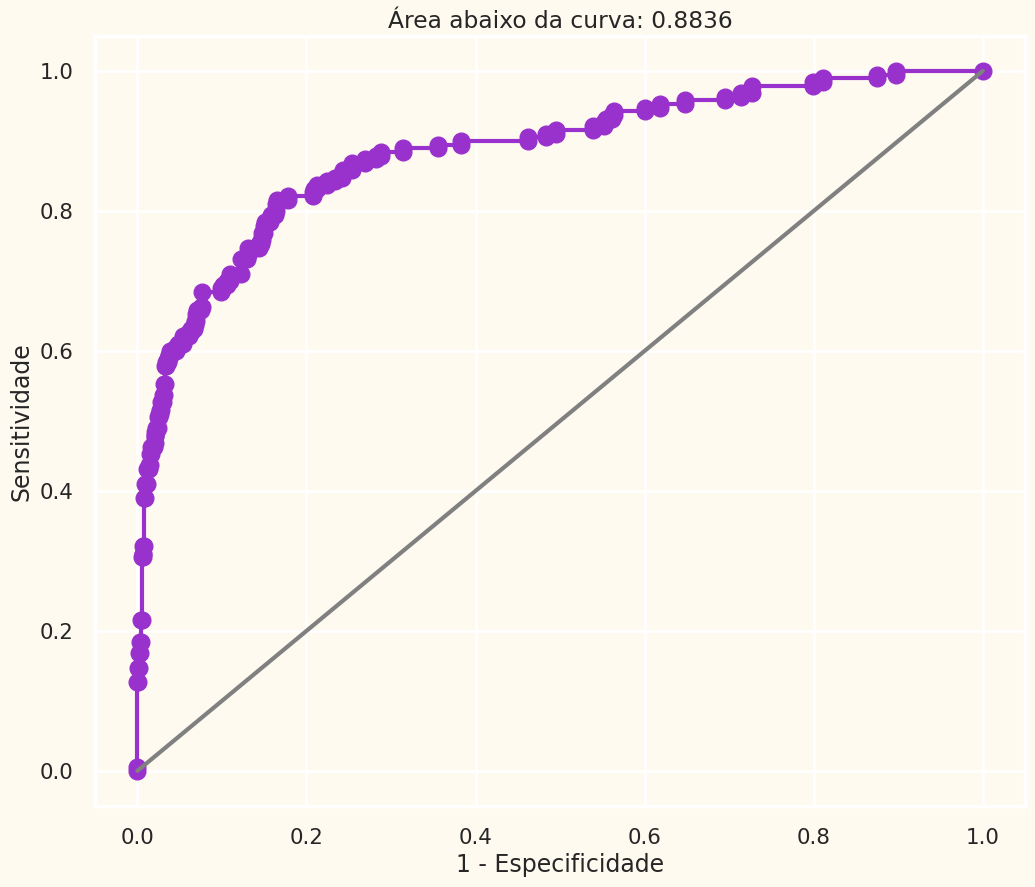

In [66]:
# Plotagem da curva ROC propriamente dita base de treino

plt.figure(figsize=(12,10))
plt.plot(fpr_treino, tpr_treino, '-o', color='darkorchid')
plt.plot(fpr_treino, fpr_treino, color='gray')
plt.title('Área abaixo da curva: %g' % round(roc_auc_treino,4))
          #+' | Coeficiente de GINI: %g' % round(gini_treino,4), fontsize=17)
plt.xlabel('1 - Especificidade', fontsize=17)
plt.ylabel('Sensitividade', fontsize=17)
plt.show()

In [67]:
# Função 'roc_curve' do pacote 'metrics' do sklearn

fpr_teste, tpr_teste, thresholds_teste = roc_curve(df_teste['Attrition'],df_teste['phat'])
roc_auc_teste = auc(fpr_teste, tpr_teste)

# Cálculo do coeficiente de GINI
gini_teste = (roc_auc_teste - 0.5)/(0.5)

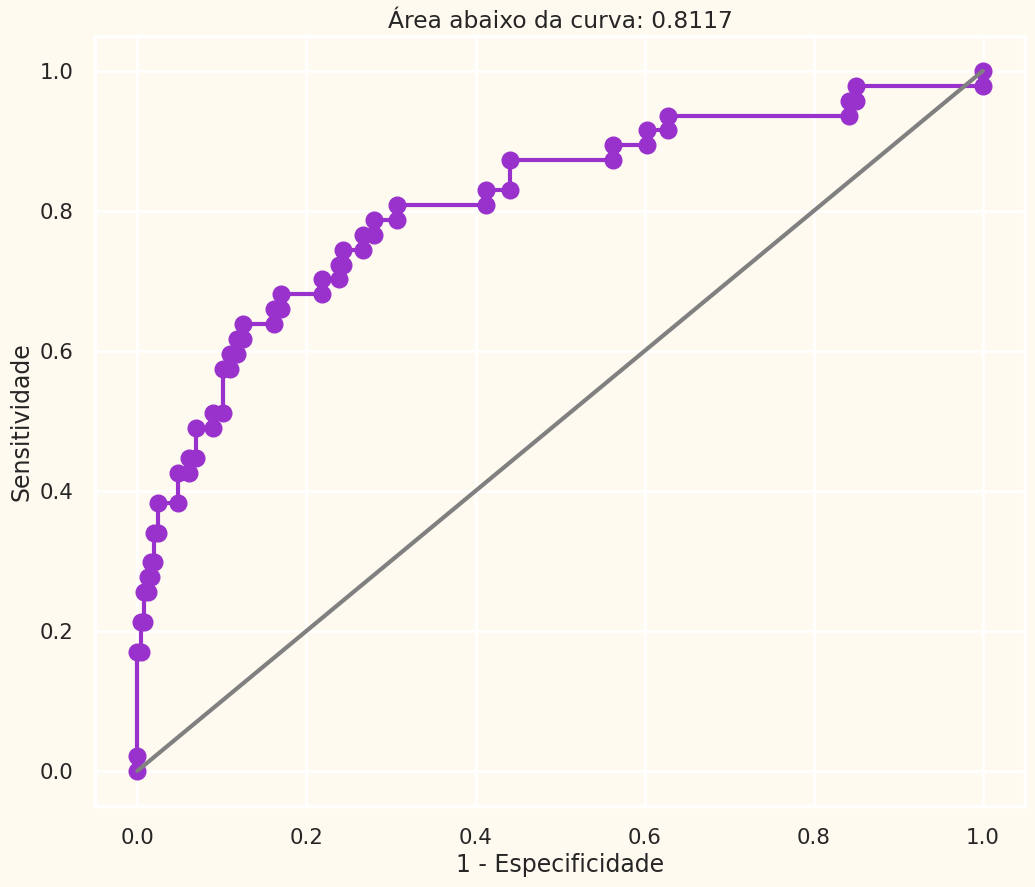

In [68]:
# Plotagem da curva ROC propriamente dita base de teste

plt.figure(figsize=(12,10))
plt.plot(fpr_teste, tpr_teste, '-o', color='darkorchid')
plt.plot(fpr_teste, fpr_teste, color='gray')
plt.title('Área abaixo da curva: %g' % round(roc_auc_teste,4))
          #+' | Coeficiente de GINI: %g' % round(gini_teste,4), fontsize=17)
plt.xlabel('1 - Especificidade', fontsize=17)
plt.ylabel('Sensitividade', fontsize=17)
plt.show()